<a href="https://colab.research.google.com/github/trunggiang2202/death-analysis/blob/main/notebook/death_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/trunggiang2202/death-analysis/main/data/Cause_of_death_2009_2019.csv"
df = pd.read_csv(url)

df.head()

,Entity,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number),Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
0,United States,2009,1186.0,644331.0,0.0,10551.0,891.0,68989.0,10637.0,71235.0,823362.0,78863.0,179468.0,54496.0,106814.0,137.0,118965.0,24760.0
1,United States,2010,1141.0,648290.0,0.0,9143.0,868.0,68625.0,10928.0,69915.0,820215.0,82391.0,182265.0,55472.0,108110.0,129.0,121781.0,25309.0
2,United States,2011,1126.0,659516.0,0.0,8428.0,862.0,69967.0,11327.0,68571.0,830800.0,86464.0,187463.0,57598.0,111120.0,124.0,124656.0,26123.0
3,United States,2012,1108.0,668318.0,0.0,7973.0,858.0,70573.0,11466.0,67741.0,837102.0,89367.0,191590.0,59351.0,113403.0,121.0,127120.0,26781.0
4,United States,2013,1106.0,678428.0,0.0,7682.0,871.0,72196.0,11553.0,67235.0,847344.0,92802.0,196459.0,61199.0,116058.0,120.0,129640.0,27531.0


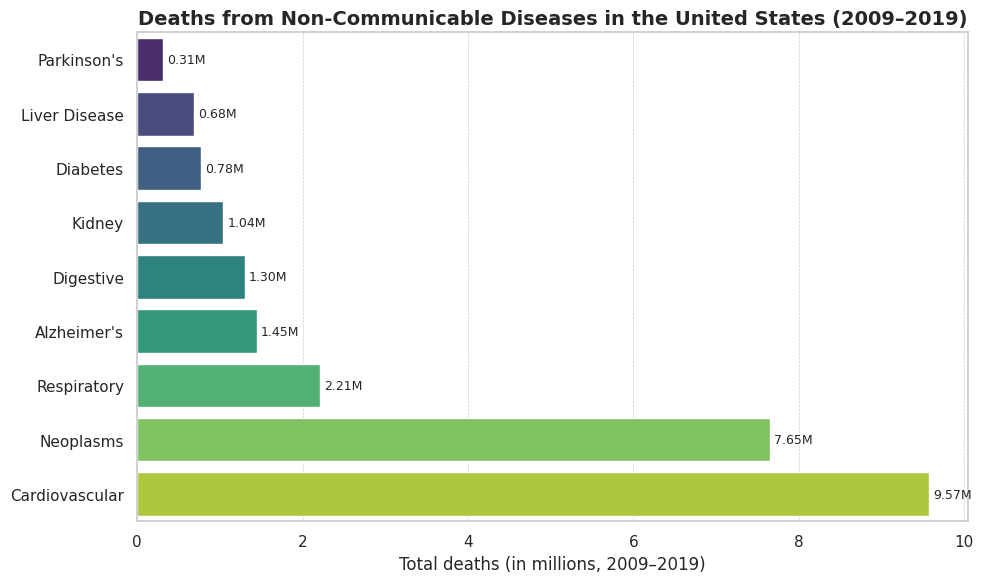

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
url = "https://raw.githubusercontent.com/trunggiang2202/death-analysis/main/data/Cause_of_death_2009_2019.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()

# Mapping short names
column_mapping = {
    'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)': 'Neoplasms',
    'Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)': 'Diabetes',
    'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)': 'Cardiovascular',
    'Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)': 'Respiratory',
    'Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)': 'Kidney',
    'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)': 'Liver Disease',
    'Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)': 'Digestive',
    "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)": "Alzheimer's",
    "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)": "Parkinson's"
}

# US data for 2009–2019
df_us = df[(df['Entity'] == 'United States') & (df['Year'].between(2009, 2019))]

# Total deaths per disease (in millions)
total_deaths = df_us[list(column_mapping.keys())].sum().rename(column_mapping)
total_deaths = total_deaths.sort_values() / 1_000_000  # convert to millions

# Prepare DataFrame for seaborn
data_plot = pd.DataFrame({
    'Disease': total_deaths.index,
    'Deaths_Millions': total_deaths.values
})

# Plot bar chart
sns.set(style="whitegrid")  # Enable default grid
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=data_plot,
    x='Deaths_Millions',
    y='Disease',
    hue='Disease',
    palette='viridis',
    dodge=False,
    legend=False
)

# Annotate values
for i, v in enumerate(data_plot['Deaths_Millions']):
    ax.text(v + 0.05, i, f"{v:.2f}M", va='center', fontsize=9)

# Show x-axis grid
ax.xaxis.grid(True, linestyle='--', linewidth=0.5)
ax.yaxis.grid(False)

# Show all spines
for spine in ax.spines.values():
    spine.set_visible(True)

# Customize labels and title
ax.set_xlabel("Total deaths (in millions, 2009–2019)")
ax.set_ylabel("")
ax.set_title("Deaths from Non-Communicable Diseases in the United States (2009–2019)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


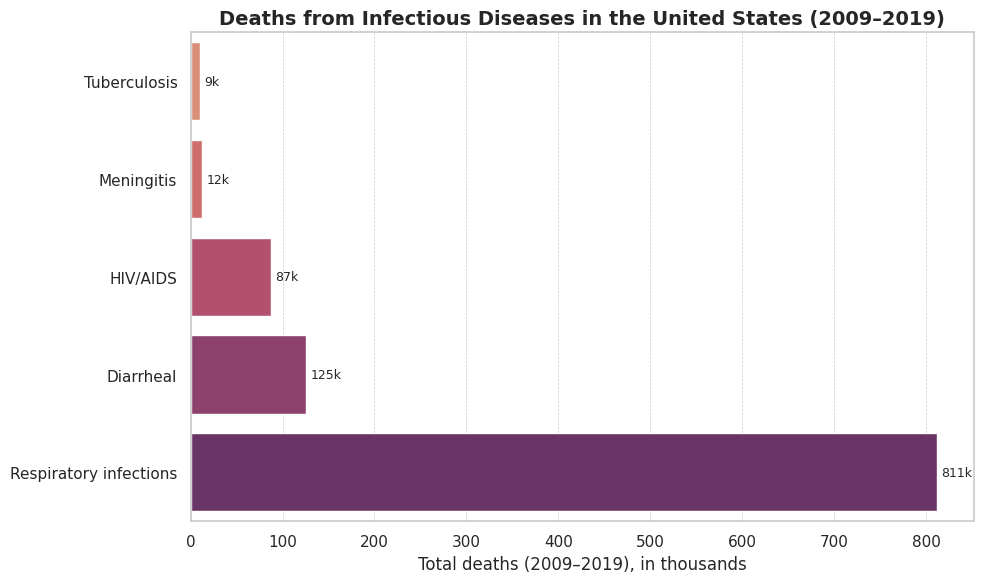

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
url = "https://raw.githubusercontent.com/trunggiang2202/death-analysis/main/data/Cause_of_death_2009_2019.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()

# Mapping short names — Malaria and Acute hepatitis have been removed
infectious_mapping = {
    'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)': 'Tuberculosis',
    'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)': 'HIV/AIDS',
    'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)': 'Respiratory infections',
    'Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)': 'Diarrheal',
    'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)': 'Meningitis'
}

# Filter data for the US and the period 2009–2019
df_us = df[(df['Entity'] == 'United States') & (df['Year'].between(2009, 2019))]

# Calculate total deaths and convert to thousands (k)
infectious_deaths_raw = df_us[list(infectious_mapping.keys())].sum().rename(infectious_mapping)
infectious_deaths_k = (infectious_deaths_raw / 1000).sort_values()

# Prepare DataFrame
data_plot = pd.DataFrame({
    'Disease': infectious_deaths_k.index,
    'Deaths (k)': infectious_deaths_k.values
})

# Plot bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=data_plot,
    x='Deaths (k)',
    y='Disease',
    hue='Disease',
    dodge=False,
    palette='flare',
    legend=False
)

# Add value labels
for i, v in enumerate(data_plot['Deaths (k)']):
    ax.text(v + 5, i, f"{int(v):,}k", va='center', fontsize=9)

# Add grid and show borders
ax.xaxis.grid(True, linestyle='--', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_visible(True)

# Set labels and title
ax.set_xlabel("Total deaths (2009–2019), in thousands")
ax.set_ylabel("")
ax.set_title("Deaths from Infectious Diseases in the United States (2009–2019)", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import plotly.express as px

# --- Read data from GitHub ---
url = "https://raw.githubusercontent.com/trunggiang2202/death-analysis/main/data/Cause_of_death_2009_2019.csv"
df = pd.read_csv(url)

# --- Preprocessing ---
df_melted = df.melt(id_vars=['Entity', 'Year'], var_name='cause', value_name='deaths')

# Clean up cause names
df_melted['cause'] = df_melted['cause']\
    .str.replace(r'Deaths - ', '', regex=True)\
    .str.replace(r' - Sex:.*', '', regex=True)

# --- Select top 9 causes of death ---
top_causes = df_melted.groupby('cause')['deaths'].sum().nlargest(9).index
df_filtered = df_melted[df_melted['cause'].isin(top_causes)].copy()

# --- Ensure all years from 2009 to 2019 are present ---
years = list(range(2009, 2020))
df_filtered['Year'] = df_filtered['Year'].astype(int)

# Create a complete grid of (year, cause)
full_grid = pd.MultiIndex.from_product([years, top_causes], names=['Year', 'cause']).to_frame(index=False)

# Aggregate actual death counts
agg = df_filtered.groupby(['Year', 'cause'])['deaths'].sum().reset_index()

# Merge with full grid to fill missing values with 0
merged = pd.merge(full_grid, agg, on=['Year', 'cause'], how='left').fillna(0)

# Pivot to cause x year format
pivot_df = merged.pivot(index='cause', columns='Year', values='deaths')

# Ensure correct column order
pivot_df = pivot_df.reindex(columns=years)

# --- Plot heatmap ---
fig = px.imshow(
    pivot_df,
    labels=dict(x="Year", y="Cause", color="Number of Deaths"),
    text_auto=True,
    color_continuous_scale='Reds',
    aspect='auto'
)

# --- Update layout ---
fig.update_layout(
    title="Heatmap: Top 9 Causes of Death (2009–2019)",
    font=dict(family='Roboto, sans-serif', size=20),
    width=1450,
    height=600,
    margin=dict(t=60, l=80, r=30, b=60),
    xaxis_title="Year",
    yaxis_title="Cause"
)

# --- Force display of all years ---
fig.update_xaxes(
    type='category',
    tickmode='array',
    tickvals=years,
    ticktext=[str(y) for y in years]
)

fig.show()


In [9]:
import pandas as pd
import plotly.express as px

# Read data
url = "https://raw.githubusercontent.com/trunggiang2202/death-analysis/main/data/Cause_of_death_2009_2019.csv"
df = pd.read_csv(url)

# Preprocessing
df_melted = df.melt(id_vars=['Entity', 'Year'], var_name='cause', value_name='deaths')
df_melted['cause'] = df_melted['cause']\
    .str.replace(r'Deaths - ', '', regex=True)\
    .str.replace(r' - Sex:.*', '', regex=True)

# Filter for infectious diseases (excluding Malaria and Acute hepatitis)
infectious_causes = [
    'Tuberculosis',
    'HIV/AIDS',
    'Lower respiratory infections',
    'Diarrheal diseases',
    'Meningitis'
]

df_filtered = df_melted[
    (df_melted['Entity'] == 'United States') &
    (df_melted['Year'].between(2009, 2019)) &
    (df_melted['cause'].isin(infectious_causes))
].copy()

# Create full grid of (year, cause) pairs
years = list(range(2009, 2020))
full_grid = pd.MultiIndex.from_product([years, infectious_causes], names=['Year', 'cause']).to_frame(index=False)
agg = df_filtered.groupby(['Year', 'cause'])['deaths'].sum().reset_index()
merged = pd.merge(full_grid, agg, on=['Year', 'cause'], how='left').fillna(0)

# Pivot table
pivot_df = merged.pivot(index='cause', columns='Year', values='deaths')
pivot_df = pivot_df.reindex(columns=years)

# Plot heatmap
fig = px.imshow(
    pivot_df,
    labels=dict(x="Year", y="Cause", color="Number of Deaths"),
    text_auto=True,
    color_continuous_scale='Reds',
    aspect='auto'
)

fig.update_layout(
    title="Heatmap: Deaths from Infectious Diseases in the United States (2009–2019)",
    font=dict(family='Roboto, sans-serif', size=20),
    width=1200,
    height=500,
    margin=dict(t=60, l=80, r=30, b=60),
    xaxis_title="Year",
    yaxis_title="Cause"
)

fig.update_xaxes(
    type='category',
    tickmode='array',
    tickvals=years,
    ticktext=[str(y) for y in years]
)

fig.show()


In [10]:
import pandas as pd
import plotly.graph_objects as go

# Read data
url = "https://raw.githubusercontent.com/trunggiang2202/death-analysis/main/data/Cause_of_death_2009_2019.csv"
df = pd.read_csv(url)
df = df[df['Entity'] == 'United States']

# Get list of causes
causes = df.columns.difference(['Entity', 'Year'])

# Calculate total deaths per year
df['total_deaths_year'] = df[causes].sum(axis=1)

# Calculate percentage for each cause
for cause in causes:
    df[cause + '_pct'] = df[cause] / df['total_deaths_year'] * 100

# Select top 9 leading causes of death over the entire period
top_causes = df[causes].sum().sort_values(ascending=False).head(9).index.tolist()

# Create figure
fig = go.Figure()
years = df['Year'].tolist()

for cause in top_causes:
    percentages = df[cause + '_pct'].round(1)
    cause_label = cause.replace('Deaths - ', '').split(' - Sex:')[0]

    fig.add_trace(go.Bar(
        y=years,
        x=percentages,
        name=cause_label,
        orientation='h',
        text=percentages.astype(str) + '%',
        textposition='inside',
        insidetextanchor='start',
        hoverinfo='skip'
    ))

# Layout
fig.update_layout(
    barmode='stack',
    title='Percentage of Deaths by Top 9 Causes in the United States (2009–2019)',
    xaxis_title='Percentage of Total Deaths (%)',
    yaxis=dict(title='Year', tickmode='array', tickvals=years),
    font=dict(family='Roboto, sans-serif', size=20),
    width=1900,
    height=750
)

fig.show()


In [11]:
import pandas as pd
import plotly.graph_objects as go

# Read data
url = "https://raw.githubusercontent.com/trunggiang2202/death-analysis/main/data/Cause_of_death_2009_2019.csv"
df = pd.read_csv(url)
df = df[df['Entity'] == 'United States']

# Select infectious disease columns
infectious_mapping = {
    'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)': 'Tuberculosis',
    'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)': 'HIV/AIDS',
    'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)': 'Respiratory infections',
    'Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)': 'Diarrheal',
    'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)': 'Meningitis'
}

# Calculate total infectious disease deaths per year
causes = list(infectious_mapping.keys())
df['total_deaths_year'] = df[causes].sum(axis=1)

# Calculate percentage for each cause
for cause in causes:
    df[cause + '_pct'] = df[cause] / df['total_deaths_year'] * 100

# Create stacked bar chart
fig = go.Figure()
years = df['Year'].tolist()

for cause in causes:
    cause_label = infectious_mapping[cause]
    percentages = df[cause + '_pct'].round(1)

    fig.add_trace(go.Bar(
        y=years,
        x=percentages,
        name=cause_label,
        orientation='h',
        text=percentages.astype(str) + '%',
        textposition='inside',
        insidetextanchor='start',
        hoverinfo='skip'
    ))

# Layout
fig.update_layout(
    barmode='stack',
    title='Percentage of Deaths from Infectious Diseases in the United States (2009–2019)',
    xaxis_title='Percentage of Total Infectious Deaths (%)',
    yaxis=dict(title='Year', tickmode='array', tickvals=years),
    font=dict(family='Roboto, sans-serif', size=20),
    width=1600,
    height=700
)

fig.show()
